In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
observations= pd.read_csv('observations.csv')
species= pd.read_csv('species_info.csv')

In [3]:
observations.head()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [62]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [ ]:
We have a extreme minority of 'In Recovery' species. What is different about them? What if anything did we do to reverse the
extinction process. Let's see if any of them are in our observations.

In [5]:
inrecovery_count= species[species.conservation_status == 'In Recovery']

In [6]:
inrecovery_count

,category,scientific_name,common_names,conservation_status
100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3143,Bird,Falco peregrinus anatum,American Peregrine Falcon,In Recovery
4565,Bird,Pelecanus occidentalis,Brown Pelican,In Recovery


In [7]:
inrecovery_obs= pd.merge(inrecovery_count, observations, how= 'inner')

In [8]:
inrecovery_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             24 non-null     object
 1   scientific_name      24 non-null     object
 2   common_names         24 non-null     object
 3   conservation_status  24 non-null     object
 4   park_name            24 non-null     object
 5   observations         24 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [ ]:
Now let's look at a count of the 'Endangered' observations.

In [9]:
endangered_count= species[species.conservation_status == 'Endangered']
endangered_obs= pd.merge(endangered_count, observations, how= 'inner')
endangered_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             80 non-null     object
 1   scientific_name      80 non-null     object
 2   common_names         80 non-null     object
 3   conservation_status  80 non-null     object
 4   park_name            80 non-null     object
 5   observations         80 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ KB


In [ ]:
Now let's chart the total observations of Endangered vs In recovery across all 7 days.

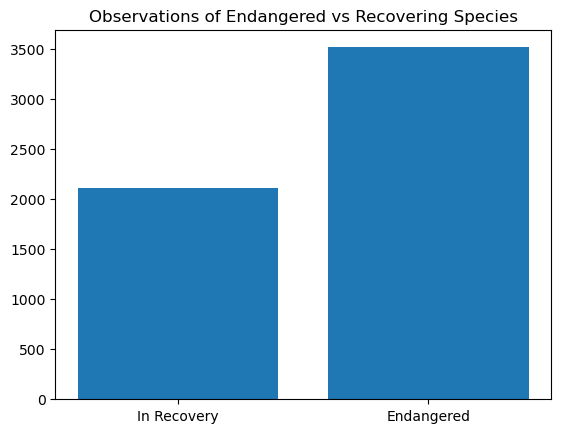

In [10]:
inrecovery_counts= inrecovery_obs.observations.sum()
endangered_counts= endangered_obs.observations.sum()
counts1= [inrecovery_counts, endangered_counts]
ax= plt.subplot()
plt.bar(range(len(counts1)), counts1 )
plt.title('Observations of Endangered vs Recovering Species')
ax.set_xticks(range(len(counts1)))
ax.set_xticklabels(['In Recovery', 'Endangered'])
plt.show()

In [39]:
Now let's look at the counts for all the conservation statuses.

dtype('int64')

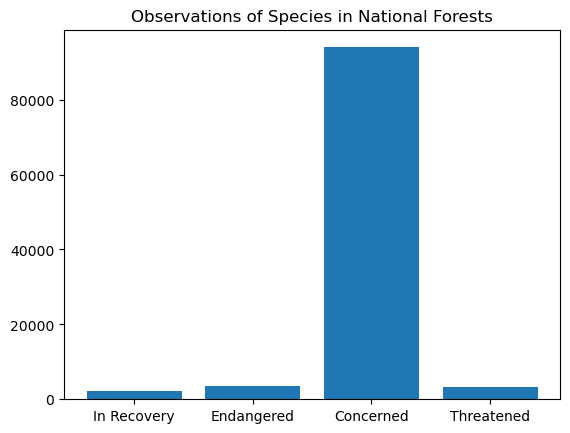

In [12]:
concerned_count= species[species.conservation_status == 'Species of Concern']
threatened_count= species[species.conservation_status == 'Threatened']
concerned_obs= pd.merge(concerned_count, observations, how= 'inner')
threatened_obs= pd.merge(threatened_count, observations, how= 'inner')
concerned_counts= concerned_obs.observations.sum()
threatened_counts= threatened_obs.observations.sum()
counts2= [inrecovery_counts, endangered_counts, concerned_counts, threatened_counts]
ax= plt.subplot()
plt.bar(range(len(counts2)), counts2 )
plt.title('Observations of Species in National Forests')
ax.set_xticks(range(len(counts2)))
ax.set_xticklabels(['In Recovery', 'Endangered', 'Concerned', 'Threatened'])
plt.show()

In [ ]:
Wow! What a huge jump in observations for concerned species over the other three. Lets look at them more in depth later.
For now let's get a chart of just the other three.

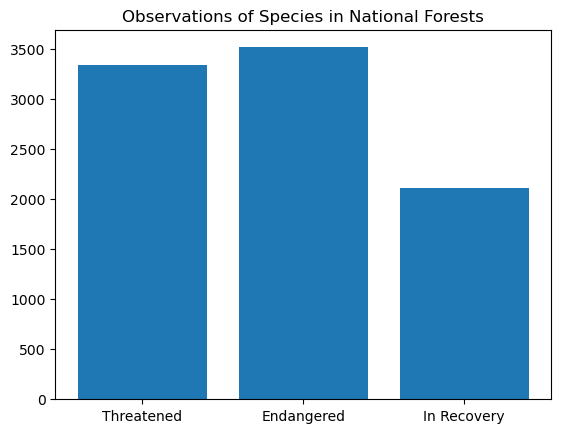

In [14]:
counts3= [threatened_counts, endangered_counts, inrecovery_counts]
ax= plt.subplot()
plt.bar(range(len(counts3)), counts3 )
plt.title('Observations of Species in National Forests')
ax.set_xticks(range(len(counts3)))
ax.set_xticklabels(['Threatened', "Endangered",'In Recovery'])
plt.show()

In [ ]:
As we look at this chart notice we have rearranged the columns. let's look at the highest species in all three groups. 
We have no species in common across the lists so we will look move on to the concerned animals and see the distribution of counts.

In [30]:
concerned_count.category.value_counts()

category
Bird                 72
Vascular Plant       43
Mammal               28
Reptile               5
Nonvascular Plant     5
Amphibian             4
Fish                  4
Name: count, dtype: int64

In [60]:
concerned_count.dtypes
concerned_birds= concerned_count[concerned_count.category == 'Bird']
concerned_birds= pd.merge(concerned_birds, observations, how= 'left')

In [61]:
concerned_birds.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Bryce National Park,95
1,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Yosemite National Park,138
2,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Yellowstone National Park,245
3,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Great Smoky Mountains National Park,65
4,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,Yosemite National Park,115


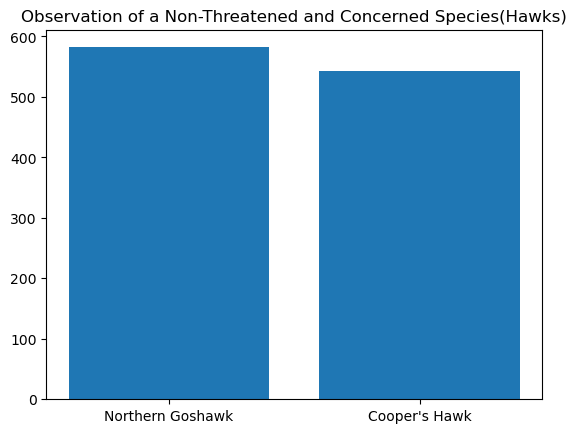

In [115]:
good_birds= species[species.conservation_status.isna()]
good_birds= good_birds[good_birds.category == 'Bird']
good_birds_obs= pd.merge(good_birds, observations, how= 'left')
northern_goshawk= good_birds_obs.iloc[4: 8]
coopers_hawk= concerned_birds.iloc[0: 4]
counts4 = [northern_goshawk.observations.sum(), coopers_hawk.observations.sum()]
ax= plt.subplot()
plt.bar(range(len(counts4)), counts4 )
plt.title('Observation of a Non-Threatened and Concerned Species(Hawks)')
ax.set_xticks(range(len(counts4)))
ax.set_xticklabels(['Northern Goshawk','Cooper\'s Hawk'])
plt.show()

In [ ]:
As we can see here the difference is less than a hundred. This can tell us how small the margin is when considering conservation.

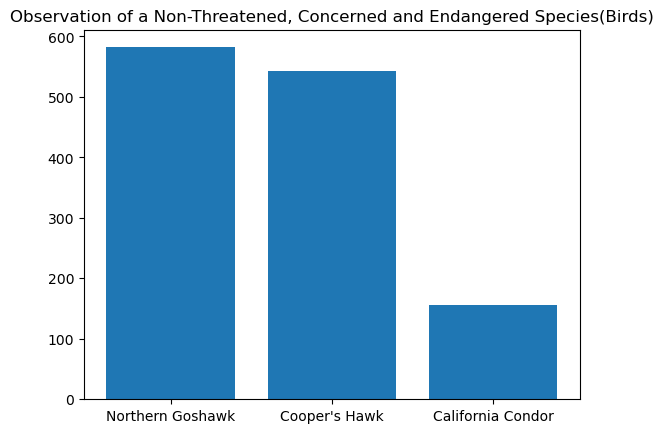

In [120]:
cali_condor = endangered_obs.iloc[72: 76]
counts5= [northern_goshawk.observations.sum(), coopers_hawk.observations.sum(), cali_condor.observations.sum()]
ax= plt.subplot()
plt.bar(range(len(counts5)), counts5)
plt.title('Observation of a Non-Threatened, Concerned and Endangered Species(Birds)')
ax.set_xticks(range(len(counts5)))
ax.set_xticklabels(['Northern Goshawk','Cooper\'s Hawk', 'California Condor'])
plt.show()

In [ ]:
As we see here the fall off is pretty steep and even when we llok at a recovering species.

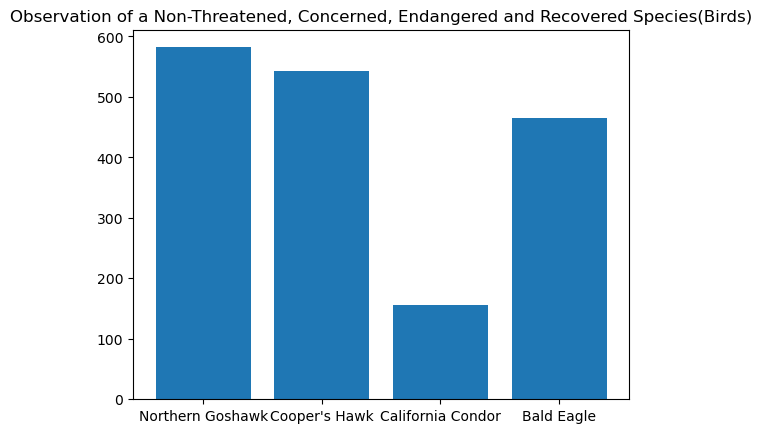

In [122]:
bald_eagle = inrecovery_obs.loc[inrecovery_obs.common_names == 'Bald Eagle']
counts6= [northern_goshawk.observations.sum(), coopers_hawk.observations.sum(), cali_condor.observations.sum(), bald_eagle.observations.sum()]
ax= plt.subplot()
plt.bar(range(len(counts6)), counts6)
plt.title('Observation of a Non-Threatened, Concerned, Endangered and Recovered Species(Birds)')
ax.set_xticks(range(len(counts6)))
ax.set_xticklabels(['Northern Goshawk','Cooper\'s Hawk', 'California Condor', 'Bald Eagle'])
plt.show()

In [ ]:
As we can see even though they are in recovery the bald eagle is not even up to the 'Concerned level'.
This evidence suggests we must do everything we can to perserve our planet as coming back from the brink is harder
than never crossing over.